In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [2]:
tf.random.set_seed(42)

In [3]:
hand = mnist.load_data()

In [4]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [5]:
(X_train, y_train), (X_test, y_test) = hand

In [6]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

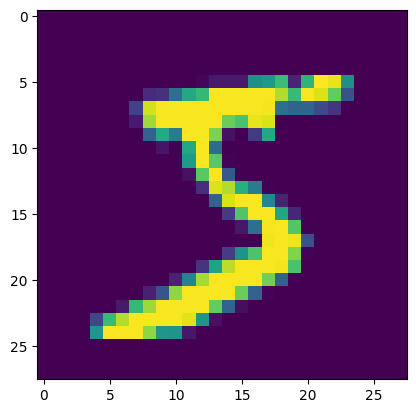

In [10]:
plt.imshow(X_train[0])

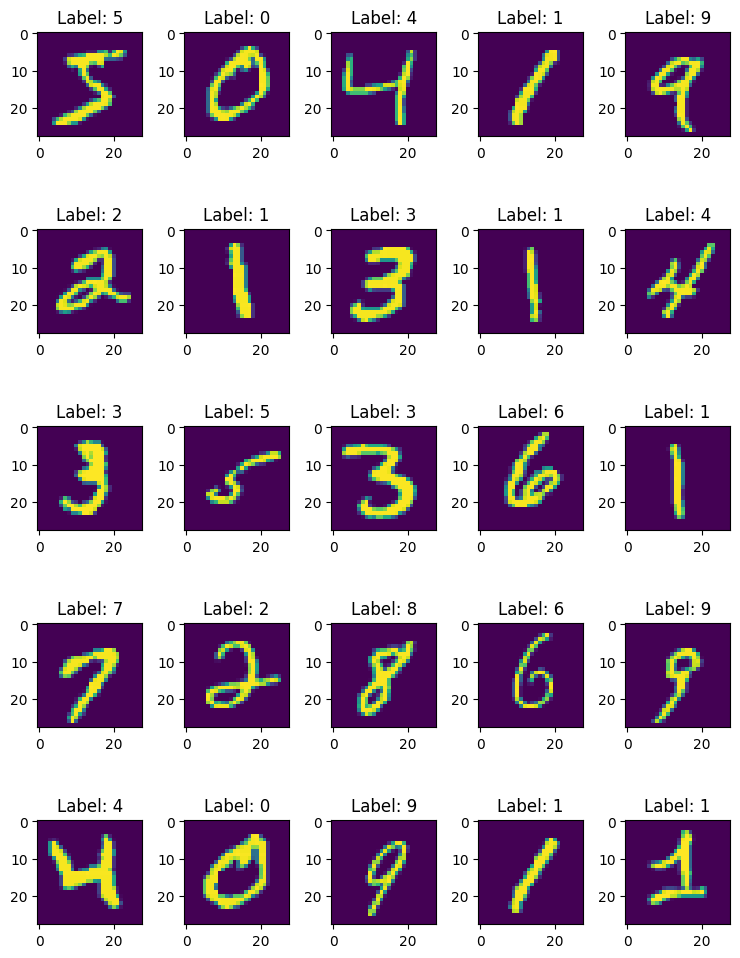

In [11]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [12]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
X_train /= 255
X_test /= 255

In [16]:
# 6. Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [17]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [18]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [21]:
from tensorflow.keras.layers import Input

epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)


# Define model architecture
model = Sequential()

# Add Input layer as the first layer
model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.8762 - loss: 0.3932
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9746 - loss: 0.0883
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9784 - loss: 0.0683
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9836 - loss: 0.0536
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9851 - loss: 0.0482
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9872 - loss: 0.0400
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9888 - loss: 0.0334
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9897 - loss: 0.0342
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9906 - loss: 0.0299
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9909 - loss: 0.0291


In [23]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 3s - 10ms/step - accuracy: 0.9914 - loss: 0.0338


In [24]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([[2.17549262e-17, 1.39927323e-11, 2.55352033e-12, 1.75812503e-10,
        6.98261722e-16, 1.17524911e-15, 1.40188745e-20, 1.00000000e+00,
        9.60062678e-17, 2.33389402e-11],
       [1.90967969e-13, 3.77220546e-11, 1.00000000e+00, 8.07129564e-15,
        1.67136554e-16, 8.18116716e-20, 9.13747227e-14, 6.77920871e-15,
        1.19058265e-14, 1.02168407e-18],
       [3.17764808e-11, 9.99999881e-01, 1.41384531e-08, 1.96712473e-11,
        3.12968886e-08, 4.18305079e-09, 6.94139635e-09, 5.59376545e-08,
        1.09050561e-07, 1.56722946e-09],
       [9.99983430e-01, 1.71610452e-11, 2.58259377e-07, 1.93197333e-10,
        3.22732951e-10, 2.57450797e-11, 1.62925353e-05, 5.52582394e-13,
        7.27234850e-09, 1.44212517e-08]], dtype=float32)

In [25]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([1.        , 1.        , 1.0000001 , 0.99999994], dtype=float32)

In [26]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [27]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[[ 973    0    1    1    0    0    2    0    3    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   1    0 1023    0    0    0    0    7    1    0]
 [   0    0    1 1006    0    1    0    0    2    0]
 [   0    0    0    0  966    0    3    0    4    9]
 [   0    0    0    5    0  885    1    0    1    0]
 [   3    1    0    1    1    2  948    0    2    0]
 [   0    1    4    0    0    0    0 1020    1    2]
 [   1    0    1    1    0    0    0    1  970    0]
 [   1    0    0    1    2    4    0    2    8  991]]


In [40]:
path = r"C:\Users\luis\Desktop\Carrer Foundry boot camp\Machine Learning Specialization\Images"
path

'C:\\Users\\luis\\Desktop\\Carrer Foundry boot camp\\Machine Learning Specialization\\Images'

In [48]:
# Check an image example

img = Image.open(os.path.join(path, 'test image B&W 1.png'))
print("The Image format is:", img.format)
print("The size format is:", img.size)
print("The Image mode is:", img.mode)

newsize = (28,28)
img2 = img.resize(newsize)
img2

testimg = asarray(img2)

print("The testing shape is:", testimg.shape)

testimg = testimg.reshape(1, 28, 28, 1)

# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print("The digit predicted is:", digit)

The Image format is: PNG
The size format is: (617, 651)
The Image mode is: P
The testing shape is: (28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The digit predicted is: 8


In [53]:

# Initialize lists to store the image data and labels
images = []
image_labels = []

# Loop through all PNG files in the folder
for filename in os.listdir(path):
    if filename.endswith(".png"):
        # Extract label from the filename (assuming label is at the end of the filename)
        # For example, if filenames are 'test image B&W 1.png', extract the number
        label = int(''.join(filter(str.isdigit, filename)))  # Extract numeric part of the filename

        # Open the image
        img_path = os.path.join(path, filename)
        img = Image.open(img_path)

        # Convert the image to grayscale (one single channel)
        img = img.convert('L')

        # Resize the image to 28x28
        newsize = (28, 28)
        img_resized = img.resize(newsize)

        # Convert the image to a numpy array
        img_array = np.asarray(img_resized)

        # Normalize the image data to the range [0, 1]
        img_array = img_array / 255.0

        # Reshape to match the CNN input format: (28, 28, 1)
        img_array = img_array.reshape(28, 28, 1)

        # Append the processed image and label to the respective lists
        images.append(img_array)
        image_labels.append(label)

# Convert the lists to numpy arrays
images = np.array(images)
image_labels = np.array(image_labels)

# One-hot encode the labels for CNN training
num_classes = max(image_labels) + 1  # Ensure num_classes includes the highest label
image_labels = to_categorical(image_labels, num_classes=num_classes)

# Check the shapes of the images and labels
print("Images shape:", images.shape)  # Should be (num_images, 28, 28, 1)
print("Labels shape:", image_labels.shape)  # Should be (num_images, num_classes)


Images shape: (20, 28, 28, 1)
Labels shape: (20, 11)


# testing the data

In [57]:
# Rename arrays for consistency
X_real_test = images  # Your preprocessed handwritten images
y_real_test = np.argmax(image_labels, axis=1)  # Convert one-hot encoded labels to integer labels

In [58]:
# Run the model's predictions on the handwritten data
predictions = model.predict(X_real_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [59]:
# Get the predicted class (the index of the maximum value in the output array)
predicted_labels = np.argmax(predictions, axis=1)

In [62]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_real_test, predicted_labels)
print(f"Model accuracy on handwritten data: {accuracy * 100:.2f}%")

Model accuracy on handwritten data: 10.00%


In [63]:
# Display the predicted and true labels
for i, (pred, actual) in enumerate(zip(predicted_labels, y_real_test)):
    print(f"Image {i}: Predicted = {pred}, Actual = {actual}")

Image 0: Predicted = 8, Actual = 1
Image 1: Predicted = 8, Actual = 10
Image 2: Predicted = 8, Actual = 2
Image 3: Predicted = 8, Actual = 3
Image 4: Predicted = 0, Actual = 4
Image 5: Predicted = 8, Actual = 5
Image 6: Predicted = 0, Actual = 6
Image 7: Predicted = 5, Actual = 7
Image 8: Predicted = 8, Actual = 8
Image 9: Predicted = 8, Actual = 9
Image 10: Predicted = 8, Actual = 1
Image 11: Predicted = 8, Actual = 10
Image 12: Predicted = 7, Actual = 2
Image 13: Predicted = 2, Actual = 3
Image 14: Predicted = 3, Actual = 4
Image 15: Predicted = 4, Actual = 5
Image 16: Predicted = 3, Actual = 6
Image 17: Predicted = 8, Actual = 7
Image 18: Predicted = 8, Actual = 8
Image 19: Predicted = 8, Actual = 9
